First, we begin by taking in the dataset and cleaning it up for text mining and sentiment analysis. We will also create a new csv file with the clean data.

In [1]:
# Dataset source: https://jmcauley.ucsd.edu/data/amazon/
import pandas as pd
import nltk
import math
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EthanS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EthanS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#Json structure
'''
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product
'''

'\nreviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B\nasin - ID of the product, e.g. 0000013714\nreviewerName - name of the reviewer\nvote - helpful votes of the review\nstyle - a disctionary of the product metadata, e.g., "Format" is "Hardcover"\nreviewText - text of the review\noverall - rating of the product\nsummary - summary of the review\nunixReviewTime - time of the review (unix time)\nreviewTime - time of the review (raw)\nimage - images that users post after they have received the product\n'

In [3]:
# Convert reviews to all lowercase
def to_lower(text):
    return text.lower()


# Remove special characters from reviews
def remove_special_char(text):
    newString = ''
    for i in text:
        if i.isalnum():                     # If character is alphanumeric, keep. Else, add a space
            newString = newString + i
        else:
            newString = newString + ' '
    return newString

# Remove stopwords: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    newStr = ""
    for w in words : 
        if w not in stop_words :
            newStr += w + " "
    #return [w for w in words if w not in stop_words]
    return newStr

In [4]:
def getDataFromJson(filename) :
    df = pd.read_json(filename, lines=True)
    df = df.drop(columns=['verified','reviewTime','reviewerID','asin','vote','unixReviewTime','asin','reviewerName'])
    df.reviewText = df.reviewText.apply(to_lower)
    
    df = df[df['reviewText'].str.split().str.len().gt(5)] # Reviews must have greater than 5 words to perform sentiment analysis

    df.reviewText = df.reviewText.apply(remove_special_char)
    
    df.reviewText = df.reviewText.apply(rem_stopwords)
    
    return df

In [5]:
#df = pd.read_json('Movies_and_TV_5.json', lines=True)
#df = df.drop(columns=['verified','reviewTime','reviewerID','asin','vote','unixReviewTime','asin','reviewerName'])

#df = df[df['reviewText'].str.split().str.len().gt(5)] # Reviews must have greater than 5 words to perform sentiment analysis


#df.reviewText = df.reviewText.apply(remove_special_char)


#df.reviewText = df.reviewText.apply(rem_stopwords)
df = getDataFromJson('Movies_and_TV_5.json')

# End of data cleaning, clean data set
df.to_csv("clean_data.csv")
df


overall                        style  \
0          5          {'Format:': ' DVD'}   
3          5          {'Format:': ' DVD'}   
5          5     {'Format:': ' VHS Tape'}   
6          2     {'Format:': ' VHS Tape'}   
7          5          {'Format:': ' DVD'}   
..       ...                          ...   
626        1                          NaN   
627        1          {'Format:': ' DVD'}   
628        1          {'Format:': ' DVD'}   
630        1  {'Format:': ' Prime Video'}   
631        1  {'Format:': ' Prime Video'}   

                                            reviewText  \
0               watch learn ended state dying country    
3               great read much historical info thank    
5    well done video important information american...   
6    lot information piece coming faster freight tr...   
7    essential message told society today people cl...   
..                                                 ...   
626              taste strictly porn cheaply produced    
627  nothing even remotely scary werewolf overalls ...   
628  bad 3 short story stupid please waste money ti...   
630  wanted show parts film high school english cla...   
631  could okay ultimately pretty boring hold inter...   

                                               summary  
0                                    Excellent Viewing  
3                A great read. So much historical info  
5                           Americans should see this.  
6    Lots of Info. But Mostly a Right-Wing Agenda P...  
7    This should be esential reading for everyone i...  
..                                                 ...  
626                                           One Star  
627                                            YIKES!!  
628                                           One Star  
630                                   Do not buy this.  
631                        Not much to do about Voodoo  

[529 rows x 4 columns]

In [6]:
df.iloc[528]

overall                                                       1
style                               {'Format:': ' Prime Video'}
reviewText    could okay ultimately pretty boring hold inter...
summary                             Not much to do about Voodoo
Name: 631, dtype: object

In [7]:
# Use overall to classify as positive or negative: 3+ is positive, 1 and 2 are negative
# reviewText is full review, will use for sentiment analysis
# Summary might be useful for EDA? Length of summary with score maybe?
# Style also for EDA

Now, we will perform EDA to better understand our data and find interesting information about our dataset.

<Axes: >

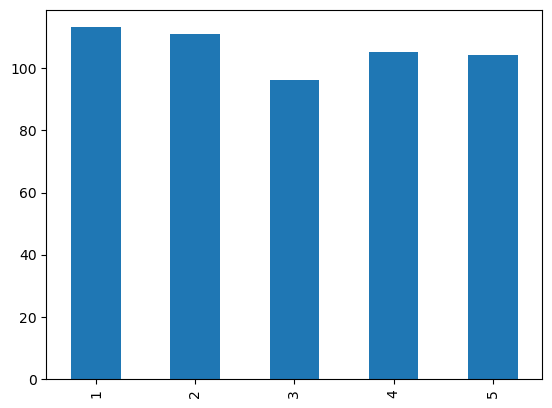

In [8]:
# EDA
pdf = df['overall'].value_counts()
pdf = pdf.reindex(sorted(pdf.index), axis = 1)
pdf.plot.bar()

In [9]:
#END OF EDA

In [10]:
#COMBINE TRAINING AND TEST SET?

In [11]:
testSet = getDataFromJson('test_set.json')
testSet.head()

overall                                         reviewText  \
0        1  movie movies bill zebub nothing garbage buy mo...   
1        1             good kind silly know good waste money    
2        1  save money folks women way less attractive ove...   
3        1  pros interesting premise recall seeing decent ...   
4        1                        junk film worth sitt watch    

                                             summary  \
0    Do not buy this or any movies from this person.   
1                                           One Star   
2  Save your money folks, the women are way less ...   
3                 Terrible, yet slightly interesting   
4                                           One Star   

                         style  
0                          NaN  
1                          NaN  
2                          NaN  
3  {'Format:': ' Prime Video'}  
4          {'Format:': ' DVD'}

In [12]:
testSize = testSet.shape[0]
testSize

50

In [13]:
# of reviews in training set
trainingSize = df.shape[0]

In [14]:
vectorizer.fit(df['reviewText'])
names = vectorizer.get_feature_names_out()
bag_of_words = vectorizer.fit(df['reviewText'])
bag_of_words = vectorizer.transform(df['reviewText'])

In [15]:
print(bag_of_words[0])

  (0, 1361)	1
  (0, 1850)	1
  (0, 1961)	1
  (0, 3296)	1
  (0, 5383)	1
  (0, 6182)	1


In [16]:
bag_of_words[0].indices

array([1361, 1850, 1961, 3296, 5383, 6182])

In [17]:
bag_of_words[0].data

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
np.array(bag_of_words[0].indices)

array([1361, 1850, 1961, 3296, 5383, 6182])

In [19]:
vectorizer.vocabulary_.get("learn")

3296

In [20]:
names[1361]

'country'

In [21]:
tfidfVect = TfidfVectorizer()

In [22]:
tfidf = tfidfVect.fit(df['reviewText'])
tfidf = tfidfVect.transform(df['reviewText'])

In [23]:
print(tfidf[2])

  (0, 6215)	0.24551129359280968
  (0, 6084)	0.3055654059761589
  (0, 3221)	0.28833106327293073
  (0, 2977)	0.48010892906449415
  (0, 2910)	0.42357593350699946
  (0, 1758)	0.3157736959368348
  (0, 325)	0.5035722421674187


In [24]:
tfidfVect.vocabulary_.get("great")

2592

In [25]:
names[325]

'americans'

In [26]:
def getSimilarity(review1, review2) :
    r1 = review1.todense()
    r2 = review2.todense()
    r1 = np.squeeze(np.asarray(r1))
    r2 = np.squeeze(np.asarray(r2))

    return dot(r1, r2) / (norm(r1) * norm(r2))

In [27]:
getSimilarity(bag_of_words[0],bag_of_words[5])

0.0

In [47]:
def classify(index) :
    i = 0
    ratings = []
    posScores = 0
    negScores = 0

    # Neighbor class we will use for knn
    class neighbor :
        def __init__(self):
            self.index = -1
            self.distance = -1
        def __eq__(self, other) :
            if(self.distance == other.distance) :
                return True
            else :
                return False
        def __lt__(self, other) :
            if(self.distance < other.distance) :
                return True
            else :
                return False
        def __gt__(self, other) :
            if(self.distance > other.distance) :
                return True
            else :
                return False

    # Get all similarity scores
    neighbors = []
    for review in df['reviewText'] :
        if i == index :
            i += 1
            continue
        sim = getSimilarity(bag_of_words[index], bag_of_words[i])
        #minimum similarity threshold
        if sim > 0.10 :
            curNeighbor = neighbor()
            curNeighbor.index = i
            curNeighbor.distance = sim
            neighbors.append(curNeighbor)

        i += 1
    
    # Get data from knn
    knn = sorted(neighbors)
    k = 51
    avgRating = 0
    curK = 0
    for neighbor in knn :
        if curK >= k :
            break
        curRating = df.iloc[neighbor.index]['overall']
        #print("Rating: ", curRating)
        ratings.append(curRating)
        if curRating < 3.0 :
            negScores += 1
        else :
            posScores += 1              
        curK += 1
    
    print("True rating ", df.iloc[index]['overall'])
    print("Pos scores: ", posScores)
    print("Neg scores: ", negScores)
    #print("Scores array : ", ratings)
    avgRating = np.mean(ratings)
    print("Avg rating : ", avgRating)
    # Algorithm for determining classification, given the meanscore and ratio of positive to negative similar reviews
    if avgRating >= 2.5 : 
        if posScores > negScores or abs(posScores - negScores) <= 3 :
            return 1
        else :
            return -1
    else :
        if posScores < negScores or abs(posScores - negScores) <= 3 :
            return -1
        else : 
            return 1 
    #print("True rating ", df.iloc[index]['overall'])
    # Now classify the row
    
    #if posScores == negScores or (posScores == 0 and negScores == 0) :
        #print("Cannot classify, unknown")
     #   return 0
    #elif posScores > negScores:
        #print("Classify as positive")
     #   return 1
    #else :
        #print("Classify as negative")
     #   return -1        

In [48]:
classify(5)

True rating  4
Pos scores:  16
Neg scores:  19
Avg rating :  2.742857142857143


1

In [49]:
# Leave one out validator
i = 0
correct = 0
incorrect = 0
for review in df['reviewText'] :
    print("Index ", i)
    trueRating = df.iloc[i]['overall']
    ratingType = 1

    if trueRating < 3.0 :
        ratingType = -1
    predicted = classify(i)
    print("Predicted: ", predicted)
    if ratingType == predicted :
        #print("Correct classification!")
        correct += 1
    else :
        print("Wrong classification")
        incorrect += 1
    i += 1
print("Correct: ", correct, " Incorrect: ", incorrect)
accuracy = correct / (correct + incorrect)
print("Accuracy: ",  accuracy)
        
        

Index  0
True rating  5
Pos scores:  17
Neg scores:  5
Avg rating :  3.6818181818181817
Predicted:  1
Index  1
True rating  5
Pos scores:  36
Neg scores:  15
Avg rating :  3.6470588235294117
Predicted:  1
Index  2
True rating  5
Pos scores:  20
Neg scores:  7
Avg rating :  3.5185185185185186
Predicted:  1
Index  3
True rating  2
Pos scores:  7
Neg scores:  7
Avg rating :  2.5714285714285716
Predicted:  1
Wrong classification
Index  4
True rating  5
Pos scores:  8
Neg scores:  3
Avg rating :  3.6363636363636362
Predicted:  1
Index  5
True rating  4
Pos scores:  16
Neg scores:  19
Avg rating :  2.742857142857143
Predicted:  1
Index  6
True rating  5
Pos scores:  45
Neg scores:  6
Avg rating :  4.235294117647059
Predicted:  1
Index  7
True rating  4
Pos scores:  17
Neg scores:  4
Avg rating :  3.8095238095238093
Predicted:  1
Index  8
True rating  5
Pos scores:  10
Neg scores:  9
Avg rating :  2.789473684210526
Predicted:  1
Index  9
True rating  5
Pos scores:  22
Neg scores:  11
Avg rati

True rating  4
Pos scores:  47
Neg scores:  4
Avg rating :  4.2745098039215685
Predicted:  1
Index  82
True rating  5
Pos scores:  23
Neg scores:  28
Avg rating :  2.6862745098039214
Predicted:  -1
Wrong classification
Index  83
True rating  5
Pos scores:  26
Neg scores:  25
Avg rating :  2.8823529411764706
Predicted:  1
Index  84
True rating  5
Pos scores:  26
Neg scores:  25
Avg rating :  2.784313725490196
Predicted:  1
Index  85
True rating  5
Pos scores:  20
Neg scores:  28
Avg rating :  2.3541666666666665
Predicted:  -1
Wrong classification
Index  86
True rating  3
Pos scores:  40
Neg scores:  11
Avg rating :  3.4705882352941178
Predicted:  1
Index  87
True rating  1
Pos scores:  29
Neg scores:  22
Avg rating :  2.980392156862745
Predicted:  1
Wrong classification
Index  88
True rating  5
Pos scores:  32
Neg scores:  19
Avg rating :  3.0
Predicted:  1
Index  89
True rating  5
Pos scores:  32
Neg scores:  19
Avg rating :  3.156862745098039
Predicted:  1
Index  90
True rating  5
Pos

True rating  4
Pos scores:  29
Neg scores:  22
Avg rating :  2.843137254901961
Predicted:  1
Index  160
True rating  5
Pos scores:  38
Neg scores:  13
Avg rating :  3.5294117647058822
Predicted:  1
Index  161
True rating  5
Pos scores:  46
Neg scores:  5
Avg rating :  4.0588235294117645
Predicted:  1
Index  162
True rating  4
Pos scores:  29
Neg scores:  22
Avg rating :  3.0392156862745097
Predicted:  1
Index  163
True rating  4
Pos scores:  41
Neg scores:  10
Avg rating :  3.9215686274509802
Predicted:  1
Index  164
True rating  5
Pos scores:  29
Neg scores:  22
Avg rating :  2.9019607843137254
Predicted:  1
Index  165
True rating  5
Pos scores:  8
Neg scores:  2
Avg rating :  4.0
Predicted:  1
Index  166
True rating  3
Pos scores:  39
Neg scores:  12
Avg rating :  3.4313725490196076
Predicted:  1
Index  167
True rating  3
Pos scores:  40
Neg scores:  11
Avg rating :  3.6470588235294117
Predicted:  1
Index  168
True rating  4
Pos scores:  47
Neg scores:  4
Avg rating :  4.156862745098

True rating  1
Pos scores:  7
Neg scores:  13
Avg rating :  2.05
Predicted:  -1
Index  238
True rating  2
Pos scores:  39
Neg scores:  12
Avg rating :  3.450980392156863
Predicted:  1
Wrong classification
Index  239
True rating  4
Pos scores:  27
Neg scores:  24
Avg rating :  2.6862745098039214
Predicted:  1
Index  240
True rating  4
Pos scores:  33
Neg scores:  18
Avg rating :  3.2549019607843137
Predicted:  1
Index  241
True rating  4
Pos scores:  37
Neg scores:  14
Avg rating :  3.4901960784313726
Predicted:  1
Index  242
True rating  4
Pos scores:  34
Neg scores:  17
Avg rating :  3.176470588235294
Predicted:  1
Index  243
True rating  4
Pos scores:  22
Neg scores:  29
Avg rating :  2.627450980392157
Predicted:  -1
Wrong classification
Index  244
True rating  3
Pos scores:  28
Neg scores:  23
Avg rating :  2.764705882352941
Predicted:  1
Index  245
True rating  3
Pos scores:  14
Neg scores:  2
Avg rating :  3.4375
Predicted:  1
Index  246
True rating  4
Pos scores:  30
Neg scores: 

True rating  3
Pos scores:  26
Neg scores:  25
Avg rating :  2.784313725490196
Predicted:  1
Index  315
True rating  2
Pos scores:  22
Neg scores:  29
Avg rating :  2.4901960784313726
Predicted:  -1
Index  316
True rating  3
Pos scores:  22
Neg scores:  22
Avg rating :  2.590909090909091
Predicted:  1
Index  317
True rating  3
Pos scores:  14
Neg scores:  9
Avg rating :  2.5652173913043477
Predicted:  1
Index  318
True rating  3
Pos scores:  7
Neg scores:  0
Avg rating :  4.0
Predicted:  1
Index  319
True rating  1
Pos scores:  8
Neg scores:  2
Avg rating :  3.4
Predicted:  1
Wrong classification
Index  320
True rating  1
Pos scores:  15
Neg scores:  12
Avg rating :  2.5185185185185186
Predicted:  1
Wrong classification
Index  321
True rating  1
Pos scores:  3
Neg scores:  3
Avg rating :  2.5
Predicted:  1
Wrong classification
Index  322
True rating  3
Pos scores:  24
Neg scores:  27
Avg rating :  2.5098039215686274
Predicted:  1
Index  323
True rating  3
Pos scores:  24
Neg scores:  2

True rating  1
Pos scores:  27
Neg scores:  24
Avg rating :  3.0
Predicted:  1
Wrong classification
Index  388
True rating  1
Pos scores:  30
Neg scores:  21
Avg rating :  2.980392156862745
Predicted:  1
Wrong classification
Index  389
True rating  1
Pos scores:  19
Neg scores:  32
Avg rating :  2.372549019607843
Predicted:  -1
Index  390
True rating  2
Pos scores:  24
Neg scores:  27
Avg rating :  2.627450980392157
Predicted:  1
Wrong classification
Index  391
True rating  1
Pos scores:  14
Neg scores:  15
Avg rating :  2.4482758620689653
Predicted:  -1
Index  392
True rating  1
Pos scores:  33
Neg scores:  18
Avg rating :  3.0588235294117645
Predicted:  1
Wrong classification
Index  393
True rating  1
Pos scores:  29
Neg scores:  22
Avg rating :  2.9607843137254903
Predicted:  1
Wrong classification
Index  394
True rating  2
Pos scores:  31
Neg scores:  20
Avg rating :  2.8627450980392157
Predicted:  1
Wrong classification
Index  395
True rating  1
Pos scores:  27
Neg scores:  24
Avg

True rating  1
Pos scores:  26
Neg scores:  25
Avg rating :  2.7450980392156863
Predicted:  1
Wrong classification
Index  460
True rating  2
Pos scores:  12
Neg scores:  20
Avg rating :  2.15625
Predicted:  -1
Index  461
True rating  2
Pos scores:  25
Neg scores:  26
Avg rating :  2.607843137254902
Predicted:  1
Wrong classification
Index  462
True rating  1
Pos scores:  1
Neg scores:  3
Avg rating :  2.0
Predicted:  -1
Index  463
True rating  2
Pos scores:  27
Neg scores:  24
Avg rating :  2.6862745098039214
Predicted:  1
Wrong classification
Index  464
True rating  2
Pos scores:  18
Neg scores:  33
Avg rating :  2.196078431372549
Predicted:  -1
Index  465
True rating  2
Pos scores:  5
Neg scores:  5
Avg rating :  2.5
Predicted:  1
Wrong classification
Index  466
True rating  1
Pos scores:  0
Neg scores:  0
Avg rating :  nan
Predicted:  -1
Index  467
True rating  2
Pos scores:  15
Neg scores:  29
Avg rating :  2.3636363636363638
Predicted:  -1
Index  468
True rating  1
Pos scores:  24

In [ ]:
frames = [df, testSet]
result = pd.concat(frames)

In [ ]:
result.tail(20)